In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_path = './../../data/processed/'

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# here we will select 'well behaved' vs bad behaved firms.
# We will compute deviations from mean level, as well as annual growth rates for both groups. for imports and exports. 

In [3]:
# We have some parameters that combine with each other.
# That is:
    
# - Level of presence of the firm in the time series.
# - Firm size (Quantile) which will determine also the n_q for aggregation
# - Taking Growth rates vs differences from mean. # These two could come as colors.

In [4]:
# How to make it? Firms belong to a quantile and have some presence level

In [5]:
col = 'ID'
df = pd.read_csv(data_path + col.replace(' ', '_')+'_Y.csv')

In [6]:
sales = df.loc[df.IMPORT == 0].groupby(['ID', 'YEAR'])['VART'].sum().unstack()

### LOG10 vs LN for the horizontal scale
logsales = np.log10(sales)
# logsales = np.log(cuadro) # LN

demlogsales = logsales.subtract(logsales.mean(1), axis = 0)


In [19]:
sizes = sales.loc[sales.sum(1).sort_values().index].sum(1)
Q = 6
parts = pd.cut(sizes.cumsum()/sizes.sum(), Q).sort_index()

In [20]:
for i, p in enumerate(parts.sort_values().unique()):
    df_ = demlogsales.loc[parts == p]
    print(df_.stack().std())

0.45991324617282453
0.6132513331371426
0.6473075101791906
0.6228845263951456
0.6405433489085854
0.9830869013811294


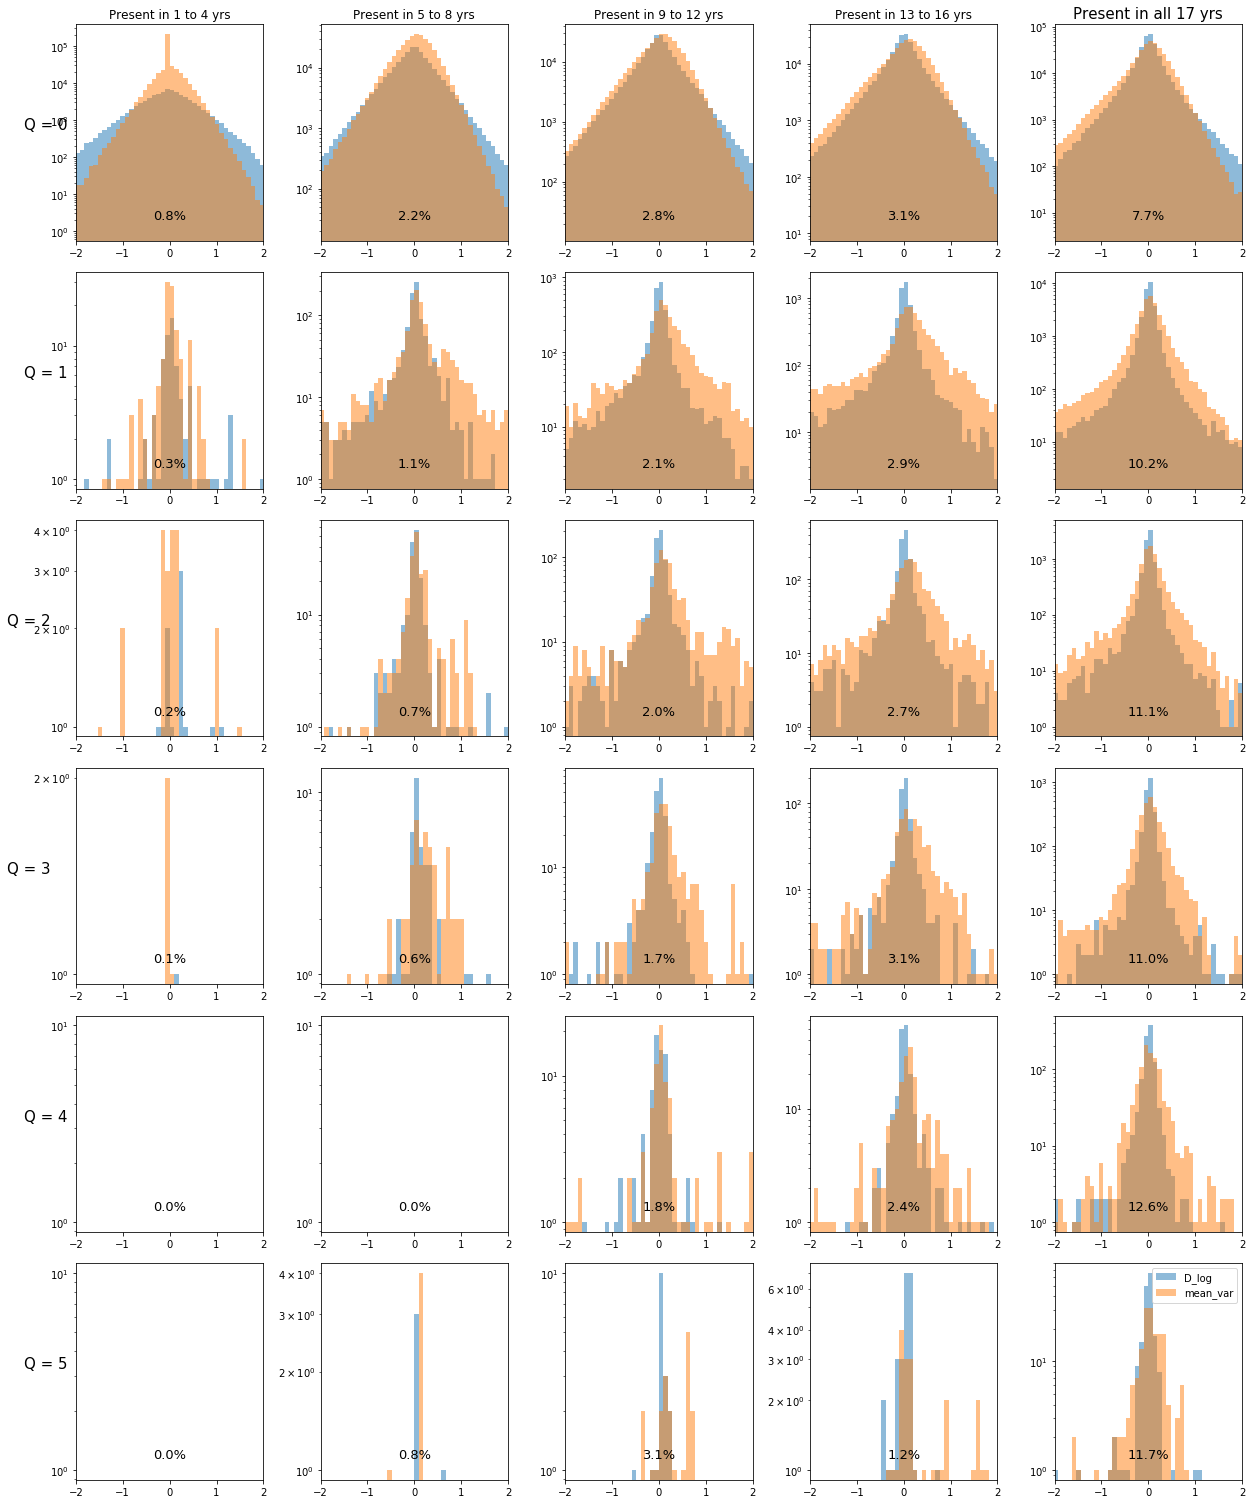

In [24]:
yrsbin = 4
n = int(np.ceil(17/yrsbin))

fig, axs = plt.subplots(Q, n, figsize = (3.5*n, 3.5*Q))

cut = 2.4

for i, p in enumerate(parts.sort_values().unique()):
    for j in range(n):
        ax = axs[i][j]
        log_rates = logsales.loc[(logsales.count(1)//yrsbin == j) & (parts == p)].diff(axis = 1).stack()
        try:
            ax.hist(log_rates.loc[abs(log_rates) < cut], bins = np.arange(-cut, cut, 2*cut/50), alpha = .5, label = 'D_log')
        except:
            pass
        # wb_curve = ax.hist(log_rates.loc[abs(log_rates) < cut], bins = 150, alpha = .5)[0]
        ax.set_yscale('log')
        ax.set_xlim(-2, 2)


    for j in range(n):
        ax = axs[i][j]
        log_shocks = demlogsales.loc[(demlogsales.count(1)//yrsbin == j) & (parts == p)].stack()
        try:
            ax.hist(log_shocks.loc[abs(log_shocks) < cut], bins = np.arange(-cut, cut, 2*cut/50), alpha = .5, label = 'mean_var')
        except:
            pass
        # wb_curve = ax.hist(log_rates.loc[abs(log_rates) < cut], bins = 150, alpha = .5)[0]
        ax.set_yscale('log')
        ax.set_xlim(-2, 2)

        value_pct = round(100*sales.loc[(sales.count(1)//yrsbin == j) & (parts == p)].sum().sum()/sales.sum().sum(), 1)
        an = ax.annotate(str(value_pct)+'%', xy=(0.5,0.1), xycoords="axes fraction", fontsize = 13, horizontalalignment ='center')


#########
## Row / Col names
#########

for ax, j in zip(axs[0], range(n)):
    ax.set_title(col)
    ax.set_title('Present in '+str(yrsbin*j + 1)+' to '+str(yrsbin*j + yrsbin)+' yrs')
    if j == n - 1: ax.set_title('Present in all 17 yrs', fontsize = 15)

rows = ['Q = {}'.format(row) for row in range(Q)]
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large', fontsize = 15)

plt.legend()
fig.tight_layout()
plt.savefig('./../../../WRITING/FIGURES/trade/Q_yrspres.png')

plt.show()


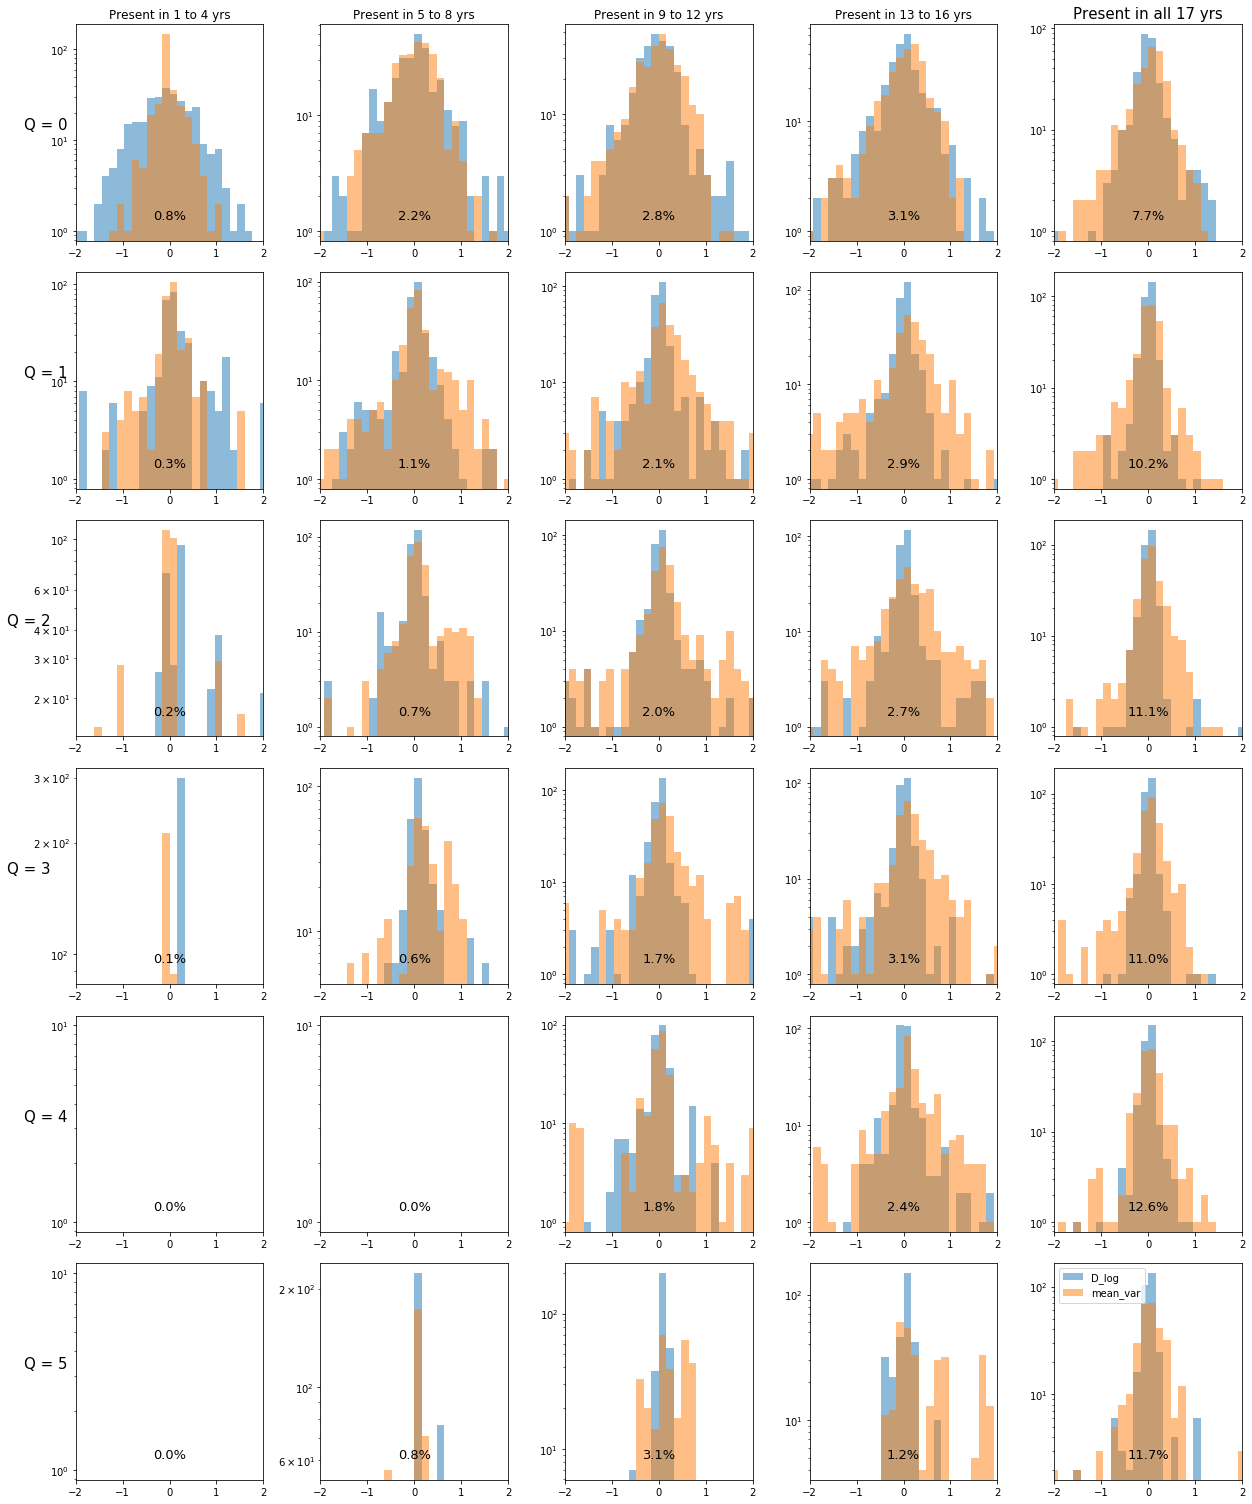

In [27]:

yrsbin = 4
n = int(np.ceil(17/yrsbin))

fig, axs = plt.subplots(Q, n, figsize = (3.5*n, 3.5*Q))

cut = 2.4

for i, p in enumerate(parts.sort_values().unique()):
    for j in range(n):
        ax = axs[i][j]
        log_rates = logsales.loc[(logsales.count(1)//yrsbin == j) & (parts == p)].diff(axis = 1).stack()
        try:
            ax.hist(log_rates.loc[abs(log_rates) < cut].sample(300, replace = True), bins = np.arange(-cut, cut, 2*cut/30), alpha = .5, label = 'D_log')
        except:
            pass
        # wb_curve = ax.hist(log_rates.loc[abs(log_rates) < cut], bins = 150, alpha = .5)[0]
        ax.set_yscale('log')
        ax.set_xlim(-2, 2)


    for j in range(n):
        ax = axs[i][j]
        log_shocks = demlogsales.loc[(demlogsales.count(1)//yrsbin == j) & (parts == p)].stack()
        try:
            ax.hist(log_shocks.loc[abs(log_shocks) < cut].sample(300, replace = True), bins = np.arange(-cut, cut, 2*cut/30), alpha = .5, label = 'mean_var')
        except:
            pass
        # wb_curve = ax.hist(log_rates.loc[abs(log_rates) < cut], bins = 150, alpha = .5)[0]
        ax.set_yscale('log')
        ax.set_xlim(-2, 2)

        value_pct = round(100*sales.loc[(sales.count(1)//yrsbin == j) & (parts == p)].sum().sum()/sales.sum().sum(), 1)
        an = ax.annotate(str(value_pct)+'%', xy=(0.5,0.1), xycoords="axes fraction", fontsize = 13, horizontalalignment ='center')


#########
## Row / Col names
#########

for ax, j in zip(axs[0], range(n)):
    ax.set_title(col)
    ax.set_title('Present in '+str(yrsbin*j + 1)+' to '+str(yrsbin*j + yrsbin)+' yrs')
    if j == n - 1: ax.set_title('Present in all 17 yrs', fontsize = 15)

rows = ['Q = {}'.format(row) for row in range(Q)]
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large', fontsize = 15)

plt.legend()
fig.tight_layout()
plt.savefig('./../../../WRITING/FIGURES/trade/Q_yrspres_downsmple.png')

plt.show()



In [8]:
# Conclusion... lo importante debe ser el n que tienen los quantiles. 
# La verdadera curva (si es laplace, subbotin o que) es dificil de en los quantiles de pocas grandes empresas 
# con lo cual no vale la pena gastarse mucho en eso. Mas bien, solo ver que hay dependencia inversa de std con n. 
# For whatever curve. Igual hacerlo con gaussian y laplace. Ya fue...


SyntaxError: invalid syntax (<ipython-input-8-574361260a0f>, line 1)